In [8]:
import pandas as pd
import seaborn as sb
import numpy as np

df = pd.read_csv(r'data\kenyan_professionals_expenditures.csv')

In [9]:
df.head()

,id,gender,profession,housing,food,transport,bills,clothing,personal_needs,debt_repayment,family_needs,health_insurance,entertainment_leisure
0,1,Female,Pharmacist,14208,9911,4584,9821,1600,2198,13852,7825,2872,2299
1,2,Male,Journalist,13473,17399,9554,7185,1303,4712,7748,6488,2172,1454
2,3,Female,Teacher,43668,19432,10999,4923,2625,2364,4265,9849,2000,1206
3,4,Female,Doctor,39320,13336,11212,5627,4341,1934,7209,4939,3724,1182
4,5,Female,Pharmacist,19320,5851,9461,2982,3379,1614,14099,2088,4821,2982


In [10]:
expenditure_columns = ['housing', 'food', 'transport', 'bills', 'clothing', 'personal_needs', 'debt_repayment', 'family_needs', 'health_insurance', 'entertainment_leisure']
df['total_expenditure'] = df[expenditure_columns].sum(axis=1)

In [11]:
df.head()

,id,gender,profession,housing,food,transport,bills,clothing,personal_needs,debt_repayment,family_needs,health_insurance,entertainment_leisure,total_expenditure
0,1,Female,Pharmacist,14208,9911,4584,9821,1600,2198,13852,7825,2872,2299,69170
1,2,Male,Journalist,13473,17399,9554,7185,1303,4712,7748,6488,2172,1454,71488
2,3,Female,Teacher,43668,19432,10999,4923,2625,2364,4265,9849,2000,1206,101331
3,4,Female,Doctor,39320,13336,11212,5627,4341,1934,7209,4939,3724,1182,92824
4,5,Female,Pharmacist,19320,5851,9461,2982,3379,1614,14099,2088,4821,2982,66597


In [12]:
df.isnull().sum()

id                       0
gender                   0
profession               0
housing                  0
food                     0
transport                0
bills                    0
clothing                 0
personal_needs           0
debt_repayment           0
family_needs             0
health_insurance         0
entertainment_leisure    0
total_expenditure        0
dtype: int64

In [13]:
df= pd.get_dummies(df, columns=['gender', 'profession'], drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
scaler = StandardScaler()

In [16]:
X = df.drop(['id', 'total_expenditure'], axis=1)
X_scaled = scaler.fit_transform(X)

In [17]:
X.head()

,housing,food,transport,bills,clothing,personal_needs,debt_repayment,family_needs,health_insurance,entertainment_leisure,gender_Male,profession_Architect,profession_Doctor,profession_Engineer,profession_Journalist,profession_Lawyer,profession_Nurse,profession_Pharmacist,profession_Software Developer,profession_Teacher
0,14208,9911,4584,9821,1600,2198,13852,7825,2872,2299,False,False,False,False,False,False,False,True,False,False
1,13473,17399,9554,7185,1303,4712,7748,6488,2172,1454,True,False,False,False,True,False,False,False,False,False
2,43668,19432,10999,4923,2625,2364,4265,9849,2000,1206,False,False,False,False,False,False,False,False,False,True
3,39320,13336,11212,5627,4341,1934,7209,4939,3724,1182,False,False,True,False,False,False,False,False,False,False
4,19320,5851,9461,2982,3379,1614,14099,2088,4821,2982,False,False,False,False,False,False,False,True,False,False


In [18]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the data into training and test sets
X = df.drop(['id', 'total_expenditure'], axis=1)
y = df['total_expenditure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
y.head()

0     69170
1     71488
2    101331
3     92824
4     66597
Name: total_expenditure, dtype: int64

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Initialize the model
model = RandomForestRegressor(random_state=42)


In [24]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
# 6. Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
# Make predictions on the test set

y_pred = model.predict(X_test)



In [27]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print(f"  MAE: {mae}")
print(f"  MSE: {mse}")
print(f"  R-squared: {r2}")


Random Forest Regressor:
  MAE: 3066.475
  MSE: 14371972.498598002
  R-squared: 0.9177594273847386


In [28]:
import numpy as np

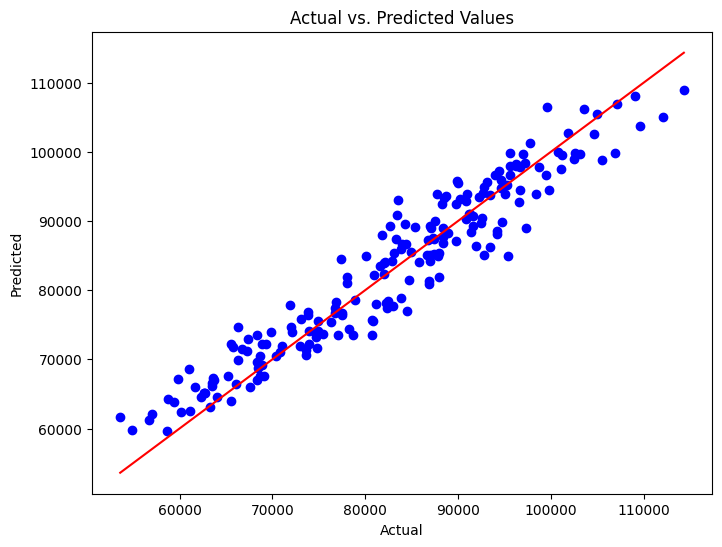

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test are the actual values and y_pred are the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # y=x line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


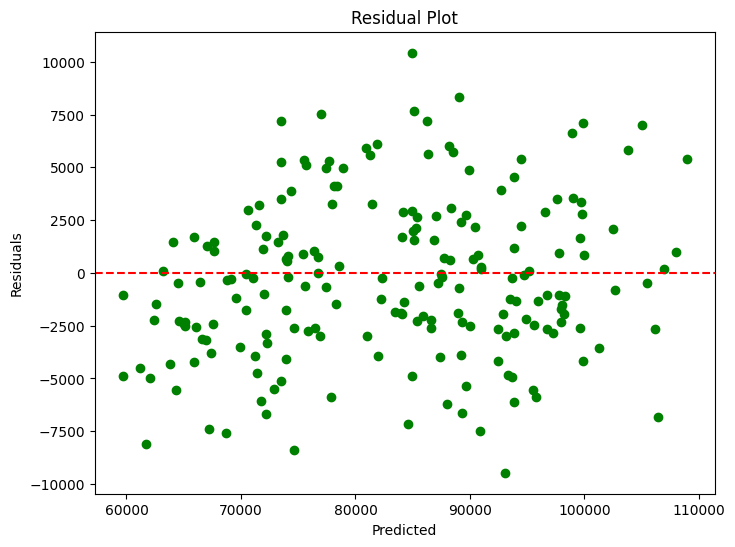

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Residuals around 0 line
plt.show()


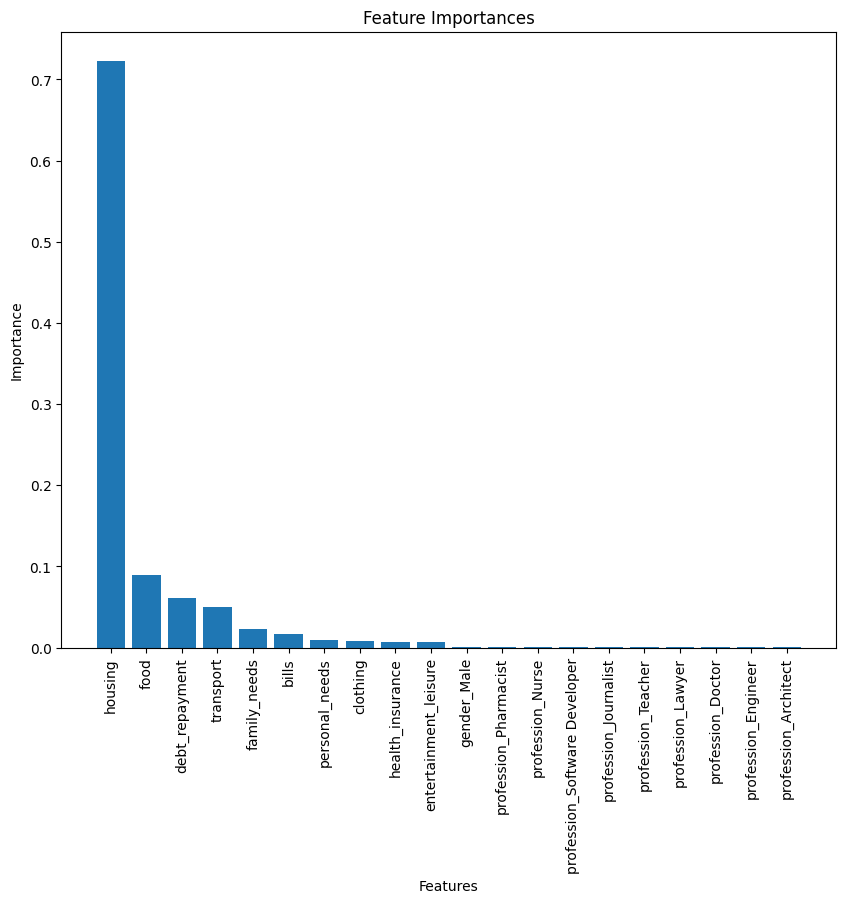

In [31]:
# Assuming rf_model is your trained Random Forest Regression model
importances = model.feature_importances_
features = X.columns  # Replace with your feature names

plt.figure(figsize=(10, 8))
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [32]:
pip install matplotlib scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


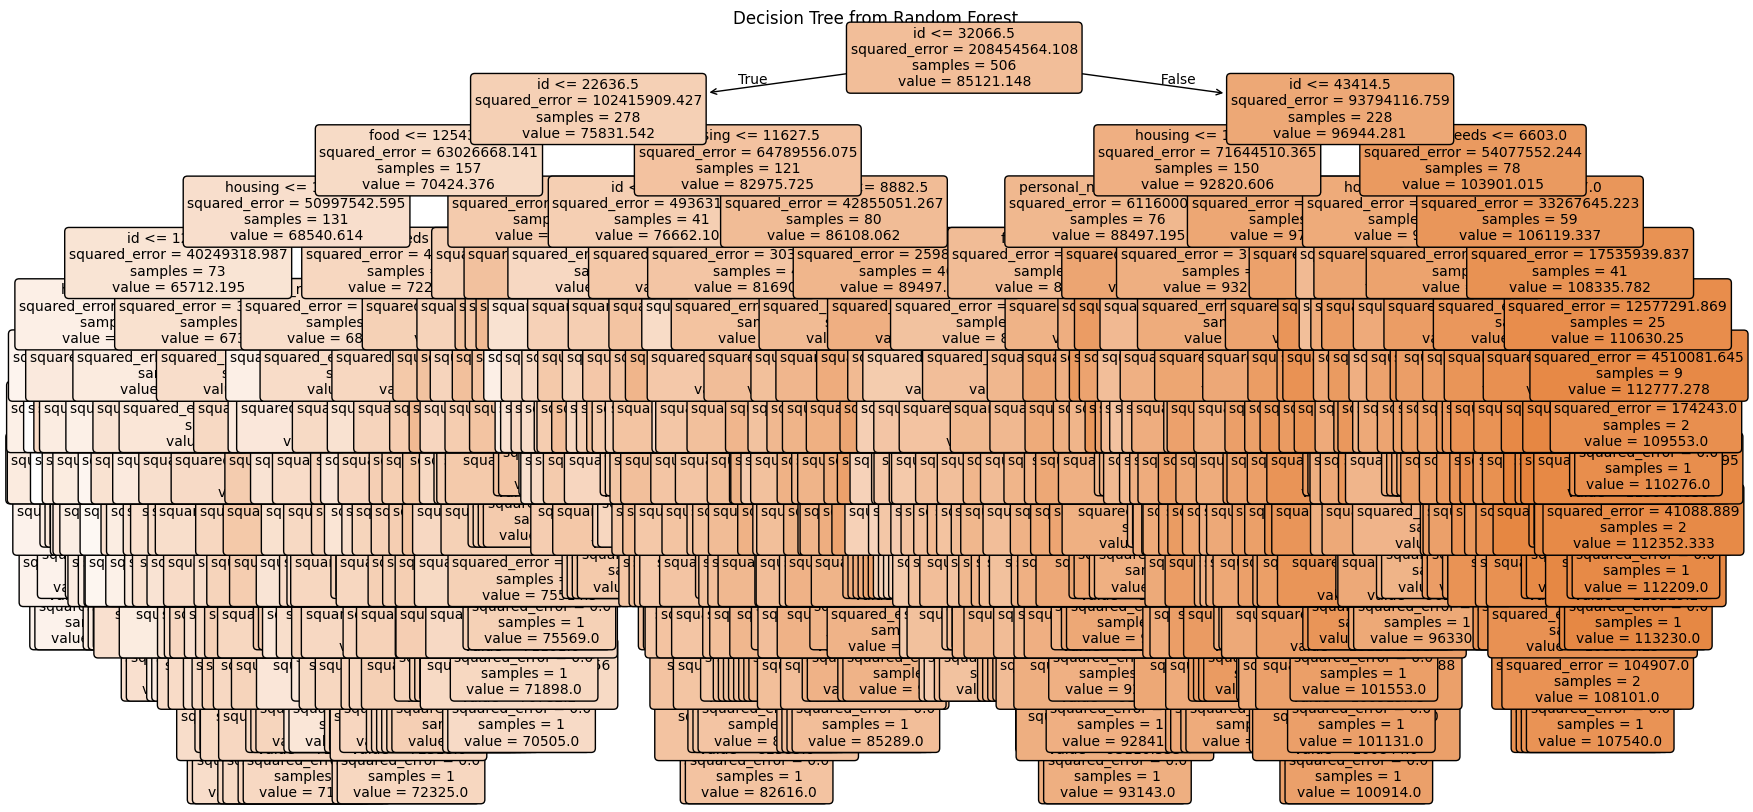

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


In [36]:
finance_data = pd.read_csv(r'data/kenyan_professionals_expenditures.csv')
finance_data.to_pickle('data/finance_data.pkl')